<a href="https://colab.research.google.com/github/deepjyotisaha85/eva4/blob/master/session9/S9_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 9'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
import torchvision
import numpy as np
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate

In [0]:
classes, trainloader, testloader = datapreparation.load(albumentations=True)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


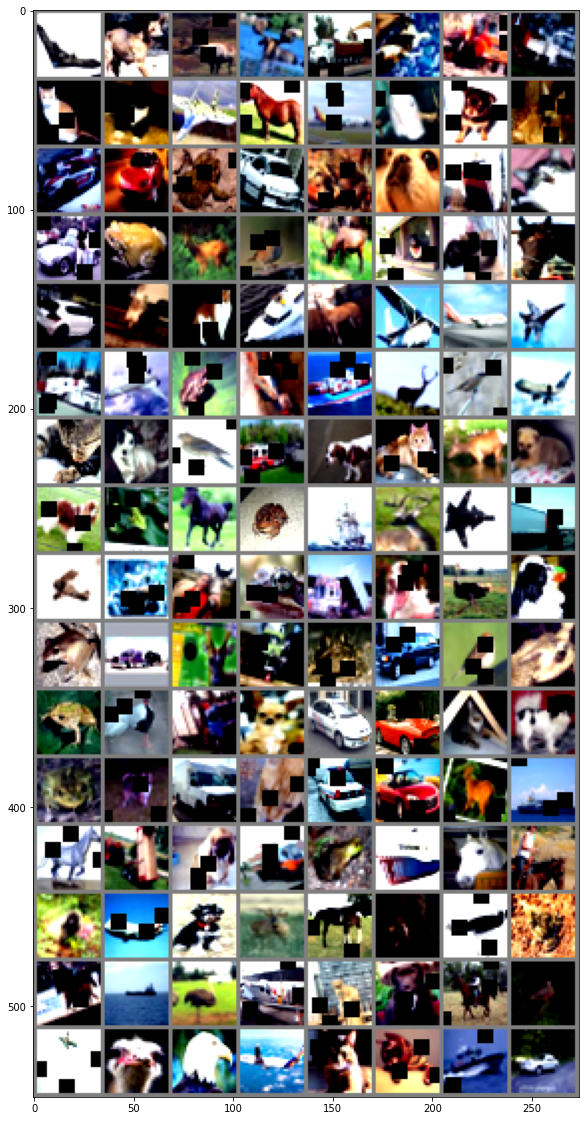

In [0]:
display.show_images(trainloader, classes, 20)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [0]:
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0432534217834473 Batch_id=390 Accuracy=47.36: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 5805/10000 (58.05%)

EPOCH: 2


Loss=0.9941245913505554 Batch_id=390 Accuracy=64.63: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7053/10000 (70.53%)

EPOCH: 3


Loss=0.5744959712028503 Batch_id=390 Accuracy=72.32: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7602/10000 (76.02%)

EPOCH: 4


Loss=0.6136917471885681 Batch_id=390 Accuracy=76.59: 100%|██████████| 391/391 [00:29<00:00, 13.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7973/10000 (79.73%)

EPOCH: 5


Loss=0.42783886194229126 Batch_id=390 Accuracy=79.31: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8058/10000 (80.58%)

EPOCH: 6


Loss=0.7101699709892273 Batch_id=390 Accuracy=81.51: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8165/10000 (81.65%)

EPOCH: 7


Loss=0.4510827660560608 Batch_id=390 Accuracy=83.31: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8126/10000 (81.26%)

EPOCH: 8


Loss=0.5219286680221558 Batch_id=390 Accuracy=84.23: 100%|██████████| 391/391 [00:29<00:00, 13.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8278/10000 (82.78%)

EPOCH: 9


Loss=0.41304922103881836 Batch_id=390 Accuracy=85.78: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8404/10000 (84.04%)

EPOCH: 10


Loss=0.4043920636177063 Batch_id=390 Accuracy=86.81: 100%|██████████| 391/391 [00:28<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8577/10000 (85.77%)

EPOCH: 11


Loss=0.4596036374568939 Batch_id=390 Accuracy=87.91: 100%|██████████| 391/391 [00:28<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8590/10000 (85.90%)

EPOCH: 12


Loss=0.4163137376308441 Batch_id=390 Accuracy=88.60: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8627/10000 (86.27%)

EPOCH: 13


Loss=0.27668267488479614 Batch_id=390 Accuracy=89.40: 100%|██████████| 391/391 [00:29<00:00, 13.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8657/10000 (86.57%)

EPOCH: 14


Loss=0.37851300835609436 Batch_id=390 Accuracy=90.03: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8592/10000 (85.92%)

EPOCH: 15


Loss=0.2777700424194336 Batch_id=390 Accuracy=90.62: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8610/10000 (86.10%)

EPOCH: 16


Loss=0.2469082623720169 Batch_id=390 Accuracy=91.30: 100%|██████████| 391/391 [00:29<00:00, 13.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8574/10000 (85.74%)

EPOCH: 17


Loss=0.2869684398174286 Batch_id=390 Accuracy=91.69: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8780/10000 (87.80%)

EPOCH: 18


Loss=0.30654314160346985 Batch_id=390 Accuracy=92.34: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8639/10000 (86.39%)

EPOCH: 19


Loss=0.2880064845085144 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8818/10000 (88.18%)

EPOCH: 20


Loss=0.2652968764305115 Batch_id=390 Accuracy=92.90: 100%|██████████| 391/391 [00:29<00:00, 13.45it/s]



Test set: Average loss: 0.0033, Accuracy: 8758/10000 (87.58%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog  frog   cat plane  deer
Predicted:    dog  frog   cat plane  deer


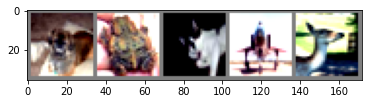

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 87 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 93 %
Accuracy of   car : 93 %
Accuracy of  bird : 95 %
Accuracy of   cat : 71 %
Accuracy of  deer : 91 %
Accuracy of   dog : 72 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 93 %
Accuracy of truck : 100 %
